### `Project - MovieLens Data Analysis`

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, we will be using this data to act as a means to demonstrate our skill in using Python to “play” with data.


### `Objective:`
- To implement the techniques learnt as a part of the course.

### `Learning Outcomes:`
- Exploratory Data Analysis

- Visualization using Python

- Pandas – groupby, merging 


### `Domain` 
- Internet and Entertainment

**Note that the project will need you to apply the concepts of groupby and merging extensively.**

### `Datasets Information:`


*rating.csv:* It contains information on ratings given by the users to a particular movie.
- user id: id assigned to every user
- movie id: id assigned to every movie
- rating: rating given by the user
- timestamp: Time recorded when the user gave a rating



*movie.csv:* File contains information related to the movies and their genre.
- movie id: id assigned to every movie
- movie title: Title of the movie
- release date: Date of release of the movie
- Action: Genre containing binary values (1 - for action 0 - not action)
- Adventure: Genre containing binary values (1 - for adventure 0 - not adventure)
- Animation: Genre containing binary values (1 - for animation 0 - not animation)
- Children’s: Genre containing binary values (1 - for children's 0 - not children's)
- Comedy: Genre containing binary values (1 - for comedy 0 - not comedy)
- Crime: Genre containing binary values (1 - for crime 0 - not crime)
- Documentary: Genre containing binary values (1 - for documentary 0 - not documentary)
- Drama: Genre containing binary values (1 - for drama 0 - not drama)
- Fantasy: Genre containing binary values (1 - for fantasy 0 - not fantasy)
- Film-Noir: Genre containing binary values (1 - for film-noir 0 - not film-noir)
- Horror: Genre containing binary values (1 - for horror 0 - not horror)
- Musical: Genre containing binary values (1 - for musical 0 - not musical)
- Mystery: Genre containing binary values (1 - for mystery 0 - not mystery)
- Romance: Genre containing binary values (1 - for romance 0 - not romance)
- Sci-Fi: Genre containing binary values (1 - for sci-fi 0 - not sci-fi)
- Thriller: Genre containing binary values (1 - for thriller 0 - not thriller)
- War: Genre containing binary values (1 - for war 0 - not war)
- Western: Genre containing binary values (1 - for western - not western)



*user.csv:* It contains information of the users who have rated the movies.
- user id: id assigned to every user
- age: Age of the user
- gender: Gender of the user
- occupation: Occupation of the user
- zip code: Zip code of the use


**`Please provide you insights wherever necessary.`**

### 1. Import the necessary packages - 2.5 marks

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

### 2. Read the 3 datasets into dataframes - 2.5 marks

In [2]:
Data = pd.read_csv('Data.csv')
items = pd.read_csv('item.csv')
users = pd.read_csv('user.csv')

### 3. Apply info, shape, describe, and find the number of missing values in the data - 5 marks
 - Note that you will need to do it for all the three datasets seperately

In [11]:
#Data info
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user id    100000 non-null  int64
 1   movie id   100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


In [21]:
#Data shape
Data.shape

(100000, 4)

In [33]:
#Data description #1
Data.describe

<bound method NDFrame.describe of        user id  movie id  rating  timestamp
0          196       242       3  881250949
1          186       302       3  891717742
2           22       377       1  878887116
3          244        51       2  880606923
4          166       346       1  886397596
...        ...       ...     ...        ...
99995      880       476       3  880175444
99996      716       204       5  879795543
99997      276      1090       1  874795795
99998       13       225       2  882399156
99999       12       203       3  879959583

[100000 rows x 4 columns]>

In [34]:
#Data description #2 with 5 point summary
Data.describe()

,user id,movie id,rating,timestamp
count,100000.00000,100000.000000,100000.000000,1.000000e+05
mean,462.48475,425.530130,3.529860,8.835289e+08
std,266.61442,330.798356,1.125674,5.343856e+06
min,1.00000,1.000000,1.000000,8.747247e+08
25%,254.00000,175.000000,3.000000,8.794487e+08
50%,447.00000,322.000000,4.000000,8.828269e+08
75%,682.00000,631.000000,4.000000,8.882600e+08
max,943.00000,1682.000000,5.000000,8.932866e+08


In [14]:
#Data - missing data. No missing data
Data.isna().sum()

user id      0
movie id     0
rating       0
timestamp    0
dtype: int64

In [16]:
#items info
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1681 entries, 0 to 1680
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   movie id      1681 non-null   int64 
 1   movie title   1681 non-null   object
 2   release date  1681 non-null   object
 3   unknown       1681 non-null   int64 
 4   Action        1681 non-null   int64 
 5   Adventure     1681 non-null   int64 
 6   Animation     1681 non-null   int64 
 7   Childrens     1681 non-null   int64 
 8   Comedy        1681 non-null   int64 
 9   Crime         1681 non-null   int64 
 10  Documentary   1681 non-null   int64 
 11  Drama         1681 non-null   int64 
 12  Fantasy       1681 non-null   int64 
 13  Film-Noir     1681 non-null   int64 
 14  Horror        1681 non-null   int64 
 15  Musical       1681 non-null   int64 
 16  Mystery       1681 non-null   int64 
 17  Romance       1681 non-null   int64 
 18  Sci-Fi        1681 non-null   int64 
 19  Thrill

In [17]:
#items shape
items.shape

(1681, 22)

In [35]:
#items description #1
items.describe

<bound method NDFrame.describe of       movie id                          movie title release date  unknown  \
0            1                           Toy Story   01-Jan-1995        0   
1            2                           GoldenEye   01-Jan-1995        0   
2            3                          Four Rooms   01-Jan-1995        0   
3            4                          Get Shorty   01-Jan-1995        0   
4            5                             Copycat   01-Jan-1995        0   
...        ...                                  ...          ...      ...   
1676      1678                          Mat' i syn   06-Feb-1998        0   
1677      1679                           B. Monkey   06-Feb-1998        0   
1678      1680                       Sliding Doors   01-Jan-1998        0   
1679      1681                        You So Crazy   01-Jan-1994        0   
1680      1682  Scream of Stone (Schrei aus Stein)   08-Mar-1996        0   

      Action  Adventure  Animation  Child

In [36]:
#items description #2 with 5 point summary
items.describe()

,movie id,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
count,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000
mean,841.841761,0.000595,0.149316,0.080309,0.024985,0.072576,0.300416,0.064842,0.029744,0.431291,0.013087,0.014277,0.054729,0.033314,0.036288,0.146936,0.060083,0.149316,0.042237,0.016062
std,485.638077,0.024390,0.356506,0.271852,0.156126,0.259516,0.458576,0.246321,0.169931,0.495404,0.113683,0.118667,0.227519,0.179507,0.187061,0.354148,0.237712,0.356506,0.201189,0.125751
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,422.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,842.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1262.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1682.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [23]:
#items - missing data. No missing data
items.isna().sum()

movie id        0
movie title     0
release date    0
unknown         0
Action          0
Adventure       0
Animation       0
Childrens       0
Comedy          0
Crime           0
Documentary     0
Drama           0
Fantasy         0
Film-Noir       0
Horror          0
Musical         0
Mystery         0
Romance         0
Sci-Fi          0
Thriller        0
War             0
Western         0
dtype: int64

In [24]:
#users info
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB


In [25]:
#users shape
users.shape

(943, 5)

In [37]:
#users description #1
users.describe

<bound method NDFrame.describe of      user id  age gender     occupation zip code
0          1   24      M     technician    85711
1          2   53      F          other    94043
2          3   23      M         writer    32067
3          4   24      M     technician    43537
4          5   33      F          other    15213
..       ...  ...    ...            ...      ...
938      939   26      F        student    33319
939      940   32      M  administrator    02215
940      941   20      M        student    97229
941      942   48      F      librarian    78209
942      943   22      M        student    77841

[943 rows x 5 columns]>

In [38]:
#users description #2 with 5 point summary
users.describe()

,user id,age
count,943.000000,943.000000
mean,472.000000,34.051962
std,272.364951,12.192740
min,1.000000,7.000000
25%,236.500000,25.000000
50%,472.000000,31.000000
75%,707.500000,43.000000
max,943.000000,73.000000


In [27]:
#users - missing data. No missing data
users.isna().sum()

user id       0
age           0
gender        0
occupation    0
zip code      0
dtype: int64

### 4. Find the number of movies per genre using the item data - 2.5 marks

In [30]:
items.sum()

movie id                                                  1415136
movie title     Toy Story GoldenEye Four Rooms Get Shorty Copy...
release date    01-Jan-199501-Jan-199501-Jan-199501-Jan-199501...
unknown                                                         1
Action                                                        251
Adventure                                                     135
Animation                                                      42
Childrens                                                     122
Comedy                                                        505
Crime                                                         109
Documentary                                                    50
Drama                                                         725
Fantasy                                                        22
Film-Noir                                                      24
Horror                                                         92
Musical   

### 5. Drop the movie where the genre is unknown - 2.5 marks

In [231]:
genres=items
genres=genres[genres.unknown != 1]
known_genres = genres

#confirm movie drop by looking at the count. Originally 1681 movies. One movie dropped with "unknown" genre associated
known_genres.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1680 entries, 0 to 1680
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   movie id      1680 non-null   int64 
 1   movie title   1680 non-null   object
 2   release date  1680 non-null   object
 3   unknown       1680 non-null   int64 
 4   Action        1680 non-null   int64 
 5   Adventure     1680 non-null   int64 
 6   Animation     1680 non-null   int64 
 7   Childrens     1680 non-null   int64 
 8   Comedy        1680 non-null   int64 
 9   Crime         1680 non-null   int64 
 10  Documentary   1680 non-null   int64 
 11  Drama         1680 non-null   int64 
 12  Fantasy       1680 non-null   int64 
 13  Film-Noir     1680 non-null   int64 
 14  Horror        1680 non-null   int64 
 15  Musical       1680 non-null   int64 
 16  Mystery       1680 non-null   int64 
 17  Romance       1680 non-null   int64 
 18  Sci-Fi        1680 non-null   int64 
 19  Thrill

### 6. Find the movies that have more than one genre - 5 marks

hint: use sum on the axis = 1

Display movie name, number of genres for the movie in dataframe

and also print(total number of movies which have more than one genres)

In [232]:
#Movies that have more than one genre
count_genres = known_genres.groupby(['movie title'])[["unknown","Action", "Adventure", "Animation", "Childrens", 
                                                      "Comedy", "Crime", "Documentary", "Drama", "Fantasy", 
                                                      "Film-Noir", "Horror", "Musical", "Mystery", "Romance", 
                                                      "Sci-Fi", "Thriller", "War", "Western"]].sum()

#only look at data subset dealing with titles and genres
#convert to dataframe for further analysis
row_sum = count_genres.sum(axis=1)
items_df = pd.DataFrame(row_sum)

#rename 0 column name
items_df.rename(columns={0 :'total'}, inplace=True )

#remove movies where genre is 1
collect = items_df[items_df['total'] == 1].index
items_df.drop(collect, inplace=True)

#find length for output statement
df_length = str(len(items_df))

print("")
print("")
print("There are " + df_length + " movies that have more than one genre.")
print("")

#print dataframe with movies with more than one genre
items_df



There are 848 movies that have more than one genre.



,total
movie title,
'Til There Was You,2
101 Dalmatians,2
"20,000 Leagues Under the Sea",4
2001: A Space Odyssey,4
3 Ninjas: High Noon At Mega Mountain,2
...,...
Yankee Zulu,2
Young Frankenstein,2
Young Guns,3


### 7. Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation' - 10 marks

*HINT: Use distplot for age. Use lineplot or countplot for release year.*

*HINT: Plot percentages in y-axis and categories in x-axis for ratings, gender and occupation*

*HINT: Please refer to the below snippet to understand how to get to release year from release date. You can use str.split() as depicted below or you could convert it to pandas datetime format and extract year (.dt.year)*

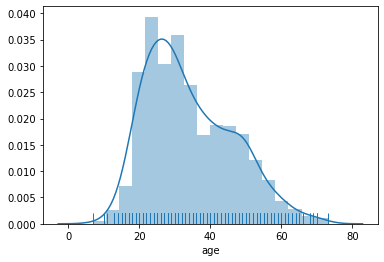

In [141]:
##AGE##------------------------------------------------------
#distplot for age
sns.distplot(users['age'], kde=True, rug=True);

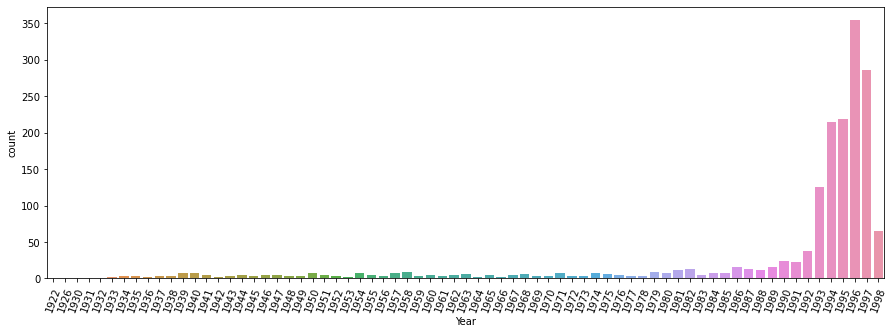

In [205]:
##RELEASE YEAR##-------------------------------------------------
#countplot for release year
#extract year from data first
year=items

#convert 'release date' object to datetime
year = pd.to_datetime(year['release date'])
year_df = pd.DataFrame(year)

#extract only the year from datetime datatype
year_df['Year'] = pd.DatetimeIndex(year_df['release date']).year

#plot extracted year in countplot
sns.countplot(x='Year', data=year_df);
plt.xticks(rotation = 70);
plt.rcParams['figure.figsize'] = (15.0, 5.0);

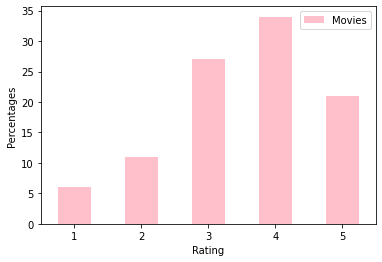

In [179]:
##RATINGS##----------------------------------------------------------
#find how many rows are associated with rating
Data_count=Data.groupby('rating').count()
Data_countDF = pd.DataFrame(Data_count)
Data_countDF.drop(['user id', 'timestamp'], axis='columns', inplace=True)

#find total number of lines for y-axis percentage calculations
total = len(Data)

#calculate percentages of ratings for y-axis
perc = Data_countDF['movie id'] = (Data_countDF['movie id'].div(total).round(2))*100

#percentages associated with ratings
perc_df = pd.DataFrame(perc)
perc_df1=perc_df
perc2=perc_df1.reset_index(drop=True)
perc2.index+=1
perc2.rename(columns={'movie id':'Movies'}, inplace=True )

#plot 
perc2.plot(kind='bar', color=['pink']);
plt.xlabel("Rating");
plt.ylabel("Percentages");
plt.xticks(rotation = 0);

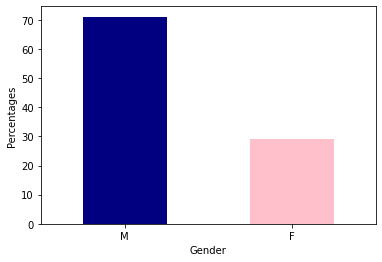

In [187]:
##GENDER##-----------------------------------------------------------------------------------------
#get gender data
genders=users

#create percentages for y-axis
genders1=genders['gender'].value_counts(normalize=True)
genders2=genders1*100

#plot
genders2.plot(kind='bar', color=['navy','pink']);
plt.xlabel("Gender");
plt.ylabel("Percentages");
plt.xticks(rotation = 0);

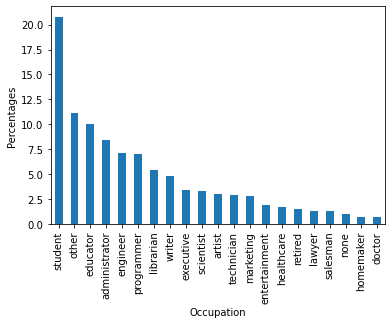

In [190]:
##OCCUPATION##-----------------------------------------------------------
#get occupation data
occu=users

#create percentages for y-axis
occu1=occu['occupation'].value_counts(normalize=True)
occu2=occu1*100

#plot
occu2.plot(kind='bar');
plt.xlabel("Occupation");
plt.ylabel("Percentages");

In [18]:
a = 'My*cat*is*brown'
print(a.split('*')[3])

#similarly, the release year needs to be taken out from release date

#also you can simply slice existing string to get the desired data, if we want to take out the colour of the cat

print(a[10:])
print(a[-5:])

brown
brown
brown


### 8. Visualize how popularity of genres has changed over the years - 10 marks

Note that you need to use the **percent of number of releases in a year** as a parameter of popularity of a genre

Hint 1: You need to reach to a data frame where the release year is the index and the genre is the column names (one cell shows the number of release in a year in one genre) or vice versa. (Drop unnecessary column if there are any)

Hint 2: Find the total number of movies release in a year(use `sum(axis=1)` store that value in a new column as 'total'). Now divide the value of each genre in that year by total to get percentage number of release in a particular year.
`(df.div(df['total'], axis= 0) * 100)`

Once that is achieved, you can either use univariate plots or can use the heatmap to visualise all the changes over the years 
in one go. 

Hint 3: Use groupby on the relevant column and use sum() on the same to find out the number of releases in a year/genre.  

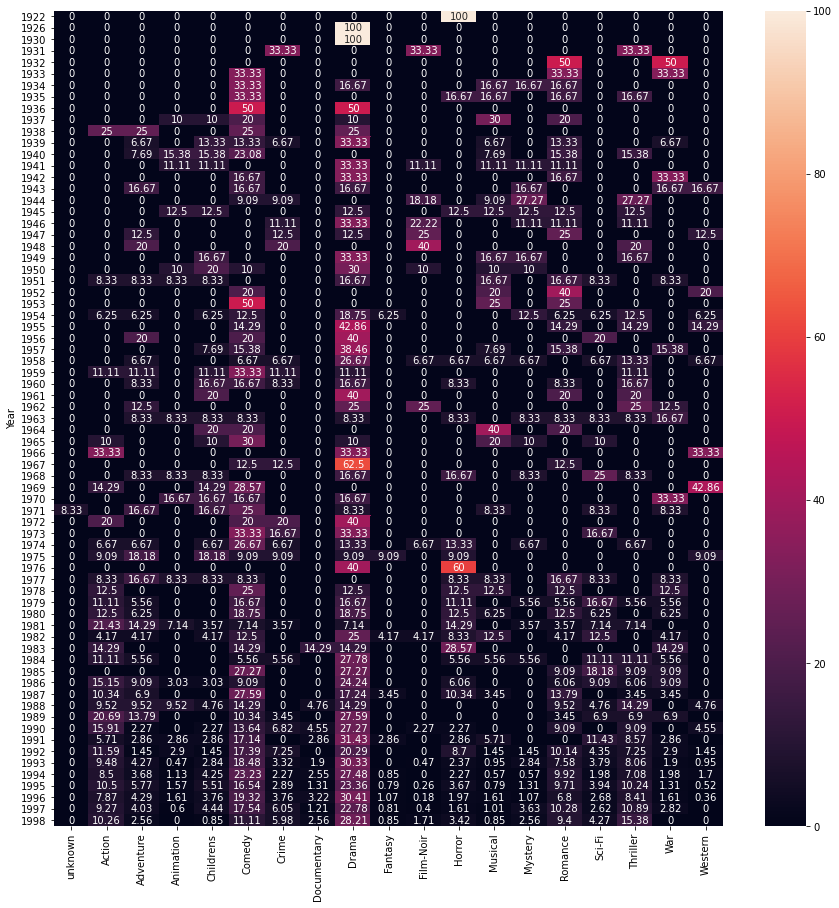

In [478]:
#extract release year-----------------------------------------------
Ryear=items

#convert 'release date' object to datetime
Ryear ['Year']=pd.DatetimeIndex(Ryear['release date']).year
#-------------------------------------------------------------------
#drop unneccessary columns
newRyear = Ryear.drop('movie id',axis='columns', inplace=False)
newRyear2 = newRyear.drop('release date',axis='columns', inplace=False)

#--------------------------------------------------------------------
#find genre sums per year
countg = newRyear2.groupby(['Year'])[["unknown","Action", "Adventure", "Animation", "Childrens", 
                                                      "Comedy", "Crime", "Documentary", "Drama", "Fantasy", 
                                                      "Film-Noir", "Horror", "Musical", "Mystery", "Romance", 
                                                      "Sci-Fi", "Thriller", "War", "Western"]].sum()
#-------------------------------------------------------------------------
#find total number of genres per year
ncountg=countg
ncountg["Total Yearly Genres"]=ncountg.sum(axis=1)

#find percentages of genres per year. genre X/total genres that year
perc = ncountg.loc[:, "unknown":"Western"].div(ncountg["Total Yearly Genres"], axis=0)*100
plotperc=perc.round(2)

#plot in heatmap
plt.figure(figsize=(15,15))

sns.heatmap(plotperc, annot=True, fmt='g');

#Conclusion:
#Overall, popular genres have been focused around first Drama, secondly Comedy and thirdly Horror. 
#There has not been a steady up/down change in any one particular genre in the past 80 years.
#The below numbers are percentages per genre per year going across, and the right side is also a percentage column 0-100%.

### 9. Find the top 25 movies according to average ratings such that each movie has number of ratings more than 100 - 10 marks

Hints : 

1. Find the count of ratings and average ratings for every movie.
2. Slice the movies which have ratings more than 100.
3. Sort values according to average rating such that movie which highest rating is on top.
4. Select top 25 movies.
5. You will have to use the .merge() function to get the movie titles.

Note: This question will need you to research about groupby and apply your findings. You can find more on groupby on https://realpython.com/pandas-groupby/.

In [572]:
#clean/remove unneccary columns
nData = Data.drop('user id', axis='columns', inplace=False)
nData = nData.drop('timestamp', axis='columns', inplace=False)

#find count of ratings/movie id
nDatan=nData.groupby('movie id').count()

#keep only movie id's where rating count is >= 100 
nDatan=nDatan[nDatan.rating >= 100]

#ensure to place rating count descending
sdata = nDatan.sort_values(['rating'], ascending=[False])

top = sdata

#reacquire individual ratings per movie id to find mean
newtop = top.merge(Data,on='movie id',how ='outer')

#drop unnecessary columns
newtop1 = newtop.drop('user id', axis='columns', inplace=False)
newtop2 = newtop1.drop('timestamp', axis='columns', inplace=False)

#drop rows where there is NaN data and other unneeded columns
newtop3 = newtop2.dropna()
newtop4 = newtop3.drop('rating_x', axis='columns', inplace=False)

#find the rating averages with movie id's
newtop5 = newtop4.groupby('movie id').mean()
newtop6 = newtop5.sort_values(['rating_y'],ascending=[False])

#select top 25 highest mean rated movie id's
newtop7 = newtop6.head(25)

#merge with item csv to get movie titles
newtop8 = pd.merge(newtop7,items, how='left', on='movie id')[['movie title', 'rating_y']]
newtop8 = newtop8.rename(columns={"rating_y": "rating"})
newtop8 = newtop8.round(2)
newtop8


,movie title,rating
0,"Close Shave, A",4.49
1,Schindler's List,4.47
2,"Wrong Trousers, The",4.47
3,Casablanca,4.46
4,"Shawshank Redemption, The",4.45
5,Rear Window,4.39
6,"Usual Suspects, The",4.39
7,Star Wars,4.36
8,12 Angry Men,4.34
9,Citizen Kane,4.29


### 10. See gender distribution across different genres check for the validity of the below statements - 10 marks

* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women

**compare the percentages**

1. Merge all the datasets

2. There is no need to conduct statistical tests around this. Just **compare the percentages** and comment on the validity of the above statements.

3. you might want ot use the .sum(), .div() function here.

4. Use number of ratings to validate the numbers. For example, if out of 4000 ratings received by women, 3000 are for drama, we will assume that 75% of the women watch drama.

In [237]:
#Use number of ratings to validate the numbers. For example, if out of 4000 ratings received by women, 
#3000 are for drama, we will assume that 75% of the women watch drama.

#rerun to ensure data is clean
Data = pd.read_csv('Data.csv')
items = pd.read_csv('item.csv')
users = pd.read_csv('user.csv')

#Merge all the datasets
two=pd.merge(Data,users, how='outer', on='user id')
df=pd.merge(two,items, how='outer', on='movie id')

tidy=df.groupby(['user id','gender'])[["Drama","Romance","Sci-Fi"]].sum()
tidy1=pd.DataFrame(tidy)
tidy2=tidy1.groupby(['gender','user id']).sum()
tidy3=pd.DataFrame(tidy2)

#find male related rated genres
tidy4=tidy3.query('gender=="M"')
tidy5=tidy4.groupby(['gender'])[["Drama","Romance","Sci-Fi"]].sum()
tidy5['Total']=tidy5.sum(axis=1)
print(tidy5)
print("")
print("")

#find female related rated genres
f=tidy3.query('gender=="F"')
f1=f.groupby(['gender'])[["Drama","Romance","Sci-Fi"]].sum()
f1['Total']=f1.sum(axis=1)
print(f1)

#Conclusions about statements give:
# "Men watch more drama than women"---FALSE!!!
##Men:(28887/52591)*100 = 54.93%
##Women: (11008/19495)*100 = 56.47%

# "Women watch more Sci-Fi than men"---FALSE!!!
##Men: (10101/52591)*100 = 19.21%
##Women: (2629/19495)*100 = 13.49%

# "Men watch more Romance than women"---FALSE!!!
##Men(13603/52591)*100 = 25.87%
##Women (5858/19495)*100 = 30.05%

          Drama  Romance   Sci-Fi    Total
gender                                    
M       28887.0  13603.0  10101.0  52591.0


          Drama  Romance  Sci-Fi    Total
gender                                   
F       11008.0   5858.0  2629.0  19495.0
